# BA780 - Dian Jin - Assignment3 - Framingham Heart Study


---



## Data and Its Source

**Data Source**\
\
The dataset was provided by professor Mohammad Soltanieh Ha and downloaded from this following link: https://github.com/soltaniehha/Intro-to-Data-Analytics/blob/main/data/AnalyticsEdge-Datasets/Framingham.csv

**Description of the Data**\
\
The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.

**Dataset Overview**


| Index| Variables | Description | Details|
| :-------- | :------- | :------- |:------- |
| 1  | male |  the gender of the observations| 0 = Female; 1 = Male |
| 2  | age | age at the time of medical examination in years|/|
| 3  | education | a categorical variable of the participants education|1 to 4: lowest to highest |
| 4  | currentSmoker | whether or not the participant is a smoker| 0 = nonsmoker; 1 = smoker |/|
| 5  | cigsPerDay | how many cigarettes does a participant smoke a day |/|
| 6  | BPMeds | whether or not the participant use anti-hypertensive medication| 0 = No, 1 = Yes |
| 7  | prevalentStroke | whether or not the patient had a stroke|0 = No; 1 = Yes|
| 8  | prevalentHyp | Whether the participant has hypertension| 0 = No; 1 = Yes|
| 9  | diabetes | whether or not the participant has diabetes | 0 = No; 1 = Yes|
| 10  | totChol | total cholesterol|mg/dL|
| 11  | sysBP |  systolic blood pressure |mmHg|
| 12  | diaBP | diastolic blood pressure|mmHg|
| 13  | BMI | BodyMass Index| weight (kg)/height (m)^2|
| 14 | heartRate | heart rate |beats/minute|
| 15  | glucose | total glucose|mg/dL|
| 16  | TenYearCHD |  the 10 year risk of coronary heart disease(CHD) |0 = No; 1 = Yes|


---



## I.The Problem Definition

**Problem Definition**

 Identify common factors or characteristics that contribute to cardiovascular disease.



## II. Import the Data

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#read the data
df = pd.read_csv('/content/gdrive/MyDrive/BA780/Framingham.csv')

Mounted at /content/gdrive


## III. Overview of the Data

In [ ]:
#first 5 rows of the dataframe
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#basic information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


**We noticed that:**

There are null values in the following columns: *education*, *cigsPerDay*, *BPMeds*, *totChol*, *BMI*, *heartRate*, and *glucose*.

Therefore, in the next section we will clean the data.

---



## IV. Tidy the Data

### A. Handle Missing Values in Categorical Data



 **1. Dealing with column *education***

For this column, we assume that the missing values may be due to the fact that the options listed do not apply to the participant's situation. Therefore, we fill the missing value by 0.

In [ ]:
df.education.fillna(0,inplace=True)

**2. Dealing with column *BPMeds***

For this column, we assume that the missing value probably because the patients are not on medication. Therefore, we fill the missing value by 0.



In [ ]:
df['BPMeds'].fillna(0,inplace=True)

### B. Handle Missing Values in Numerical Data

**1. Dealing with column *cigsPerDay***

Since the data in this column are continuous, we fill in the missing value with the median of cigarettes smoked per day by a smoker.

In [ ]:
smoker = df.cigsPerDay.where(df.currentSmoker == 1)
df['cigsPerDay'].fillna(smoker.median(), inplace=True)

*The reason for choosing an **median** value to fill the missing values is that the mean valu, unlike the mean, is not affected by the maximum and minimum values.*

We will also use *media* value for the following continuous data column if needed.

**2. Dealing with column *totChol***

Since the data in this column are continuous, we fill in the missing value with the median.

In [ ]:
df['totChol'].fillna(df['totChol'].median(), inplace=True)

**3. Dealing with column *BMI***

Since the data in this column are continuous, we fill in the missing value with the median.

In [ ]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)

**4. Dealing with column *heartRate***

Since the data in this column are continuous, we fill in the missing value with the median.

In [ ]:
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

**5. Dealing with column *glucose***

Since the data in this column are continuous, we fill in the missing value with the median.

In [ ]:
df['glucose'].fillna(df['glucose'].median(), inplace=True)

### C. Rename the *male* column into *gender*

To avoid being misleading, we changed the name of the *male* column that displays gender to *gender*.

In [ ]:
#rename male column
df.rename(columns={'male': 'gender'}, inplace=True)

###	D. Check the Clean Dataframe

In [ ]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [ ]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.930425,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943,0.151887
std,0.495027,8.572942,1.053026,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Dataset Overview**


| Index| Variables | Description | Details| Types of Data
| :-------- | :------- | :------- |:------- |:------- |
| 1  | gender |  the gender of the observations| 0 = Female; 1 = Male |Nominal|
| 2  | age | age at the time of medical examination in years|/|Continuous|
| 3  | education | a categorical variable of the participants education|1 to 4: lowest to highest | Nominal|
| 4  | currentSmoker | whether or not the participant is a smoker| 0 = nonsmoker; 1 = smoker |Nominal|
| 5  | cigsPerDay | how many cigarettes does a participant smoke a day |/|Continuous|
| 6  | BPMeds | whether or not the participant use anti-hypertensive medication| 0 = No, 1 = Yes |Nominal|
| 7  | prevalentStroke | whether or not the patient had a stroke|0 = No; 1 = Yes|Nominal|
| 8  | prevalentHyp | Whether the participant has hypertension| 0 = No; 1 = Yes|Nominal|
| 9  | diabetes | whether or not the participant has diabetes | 0 = No; 1 = Yes|Nominal|
| 10  | totChol | total cholesterol|mg/dL|Continuous|
| 11  | sysBP |  systolic blood pressure |mmHg|Continuous|
| 12  | diaBP | diastolic blood pressure|mmHg|Continuous|
| 13  | BMI | BodyMass Index| weight (kg)/height (m)^2|Continuous|
| 14 | heartRate | heart rate |beats/minute|Continuous|
| 15  | glucose | total glucose|mg/dL|Continuous|
| 16  | TenYearCHD |  the 10 year risk of coronary heart disease(CHD) |0 = No; 1 = Yes|Nominal|

**Overview:**
*   There are 4240 rows.
*   There are 16 columns with a total of 15 independent variables and one dependent variable.
*   There are 8 categorical data: *gender*, *education*, *currentSmoker*, *BPMeds*, *prevalentStroke*, *prevalentHyp*, *diabetes*, and *TenYearCHD*
*   There are 8 numerical data: *age*, *cigsPerDay*, *totChol*, *sysBP*, *diaBP*, *BMI*, *heartRate*, *glucose*
*   There are no missing values.


---



## V. Getting Insights Using Pivot Tables

**Average Age by Gender**

In [ ]:
round(df.pivot_table(values='age', index='gender', aggfunc='mean'),2)

,age
gender,
0,49.80
1,49.29


**Percentage of Smokers by Gender**

In [ ]:
round(df.pivot_table(values='currentSmoker', index='gender', aggfunc='mean') * 100 , 2)

,currentSmoker
gender,
0,40.87
1,60.77


**Average Cholesterol Level by Education Level**

In [ ]:
round(df.pivot_table(values='totChol', index='education', aggfunc='mean'),2)

,totChol
education,
0.0,239.08
1.0,238.05
2.0,235.37
3.0,236.55
4.0,234.70


**Percentage of Hypertension by Diabetes Status**

In [ ]:
round(df.pivot_table(values='prevalentHyp', index='diabetes', aggfunc='mean') * 100 ,2)

,prevalentHyp
diabetes,
0,30.48
1,53.21


**Average Heart Rate by Stroke Status**

In [ ]:
round(df.pivot_table(values='heartRate', index='prevalentStroke', aggfunc='mean'),2)

,heartRate
prevalentStroke,
0,75.90
1,73.12


##VI. Exploratory Data Analysis

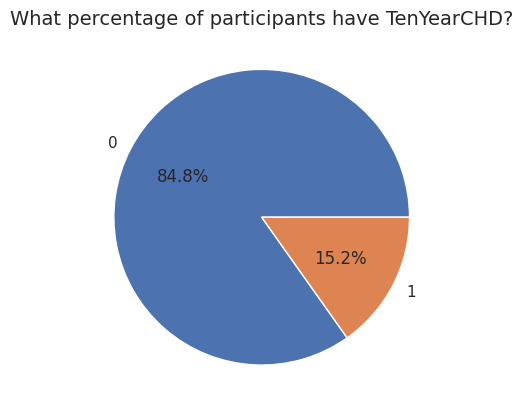

In [ ]:
sns.set(style="whitegrid")

plt.title("What percentage of participants have TenYearCHD?", fontsize=14)
labels=[0,1]

plt.pie(df["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels)

plt.show()

**Observation**

15.2% of participants have a risk of CHD in ten year. Compared with the information from Google, the rate people get CHD is 16.1%, these two values are very close, which means the dataset we selected has research implications.

<ipython-input-19-64fd0417242d>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


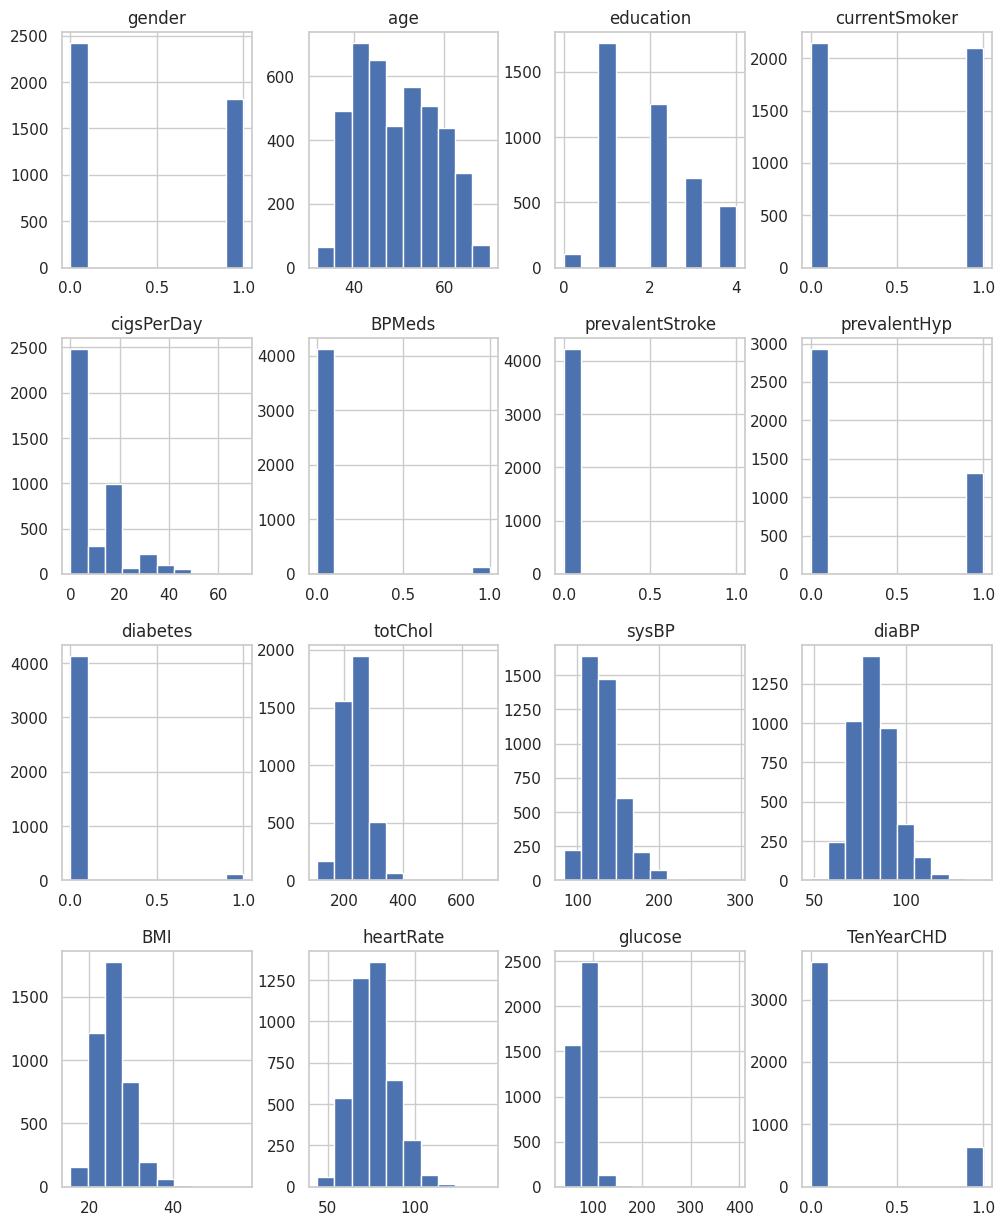

In [ ]:
sns.set(style="whitegrid")

fig = plt.figure(figsize = (12,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### A. Categorical Features



**1. Gender vs. TenYearCHD**

In [ ]:
df.groupby(['gender', 'TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
gender,,
0,2119,301
1,1477,343


In [ ]:
# Calculate the percentage of males with CHD risk
percentage_male_chd = round(343 / (343 + 1477) * 100, 2)

# Print the result
print("Percentage of males with CHD risk: " + str(percentage_male_chd) + "%")

Percentage of males with CHD risk: 18.85%


In [ ]:
# Calculate the percentage of females with CHD risk
percentage_female_chd = round(301 / (301 + 2119) * 100, 2)

# Print the result
print("Percentage of females with CHD risk: " + str(percentage_female_chd) + "%")

Percentage of females with CHD risk: 12.44%


Text(0.5, 1.02, 'Distribution of TenYearCHD by Gender')

<Figure size 800x1000 with 0 Axes>

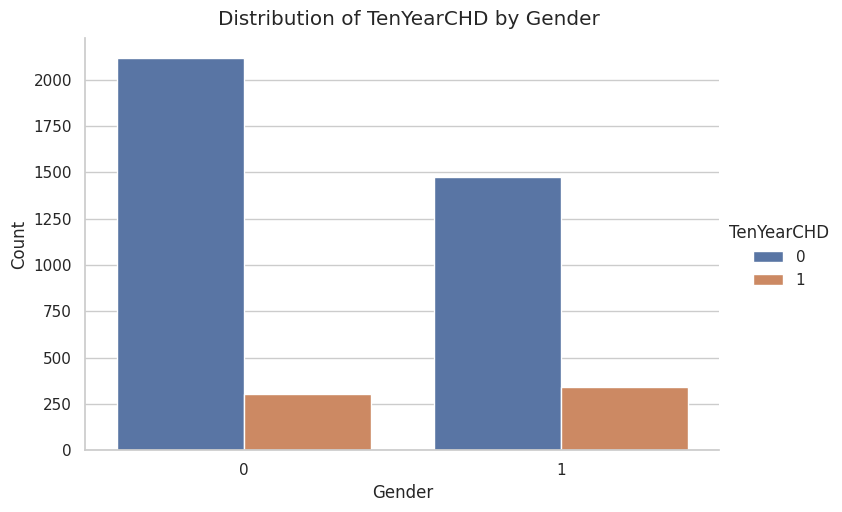

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

gender = sns.catplot(x='gender', hue='TenYearCHD', kind='count', data=df, height=5, aspect=1.5)

gender.set_axis_labels("Gender", "Count")
gender._legend.set_title("TenYearCHD")
gender.fig.suptitle("Distribution of TenYearCHD by Gender", y=1.02)

**Observation**

Males have shown a slighly higher risk of TenYearCHD. According to the information from Google, the male tend to be caught by CHD.

**2. CurrentSmoker vs. TenYearCHD**

In [ ]:
df.groupby(['currentSmoker', 'TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
currentSmoker,,
0,1834,311
1,1762,333


In [ ]:
# Calculate the percentage of current smoker with CHD risk
percentage_smoker_chd = round(333 / (333 + 1762) * 100, 2)

# Print the result
print("Percentage of current smoker with CHD risk: " + str(percentage_smoker_chd) + "%")

Percentage of current smoker with CHD risk: 15.89%


In [ ]:
# Calculate the percentage of non smoker with CHD risk
percentage_nonsmoker_chd = round(311 / (311 + 1843) * 100, 2)

# Print the result
print("Percentage of non smoker with CHD risk: " + str(percentage_nonsmoker_chd) + "%")

Percentage of non smoker with CHD risk: 14.44%


Text(0.5, 1.02, 'Distribution of TenYearCHD by Smoking Status')

<Figure size 800x1000 with 0 Axes>

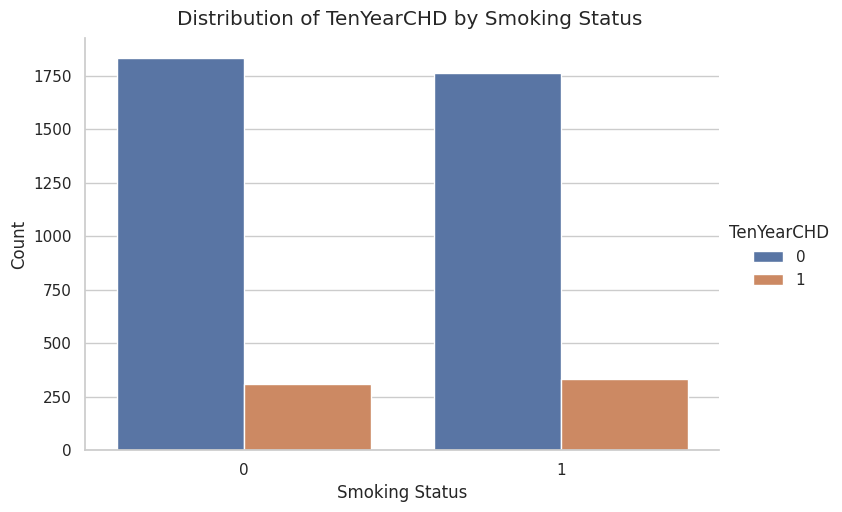

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

smoker = sns.catplot(x='currentSmoker', hue='TenYearCHD', kind='count', data=df, height=5, aspect=1.5)

smoker.set_axis_labels("Smoking Status", "Count", size=12)
smoker._legend.set_title("TenYearCHD")
smoker.fig.suptitle("Distribution of TenYearCHD by Smoking Status", y=1.02)

**Observation**

Whether or not participants smoke has little effect on the risk of TenYearCHD. This result will be contrary to our attempts. The reasons for this outcome are unknown at this time. It may be possible to follow up with further research to find out why.

**3. BPMeds vs. TenYearCHD**

In [ ]:
df.groupby(['BPMeds', 'TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
BPMeds,,
0.0,3513,603
1.0,83,41


In [ ]:
# Calculate the percentage of people use anti-hypertensive medication with CHD risk
percentage_bpmeds_chd = round(41 / (41 + 83) * 100, 2)

# Print the result
print("Percentage of people use anti-hypertensive medication with CHD risk: " + str(percentage_bpmeds_chd) + "%")

Percentage of people use anti-hypertensive medication with CHD risk: 33.06%


In [ ]:
# Calculate the percentage of people not use anti-hypertensive medication with CHD risk
percentage_nonbpmeds_chd = round(603 / (603 + 3513) * 100, 2)

# Print the result
print("Percentage of people not use anti-hypertensive medication with CHD risk: " + str(percentage_nonbpmeds_chd) + "%")

Percentage of people not use anti-hypertensive medication with CHD risk: 14.65%


Text(0.5, 1.02, 'Distribution of TenYearCHD by Anti-Hypertensive Meds Usage')

<Figure size 800x1000 with 0 Axes>

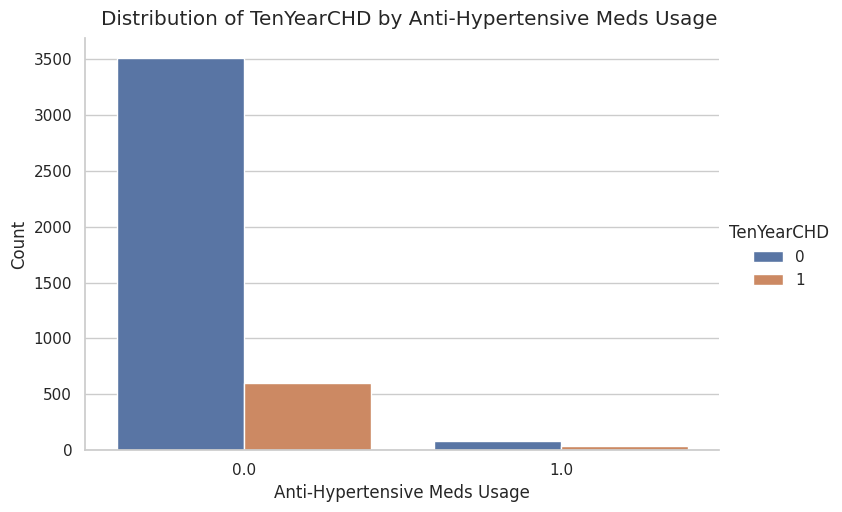

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

bpmeds = sns.catplot(x='BPMeds', hue='TenYearCHD', kind='count', data=df, height=5, aspect=1.5)

bpmeds.set_axis_labels("Anti-Hypertensive Meds Usage", "Count",size=12)
bpmeds._legend.set_title("TenYearCHD")
bpmeds.fig.suptitle("Distribution of TenYearCHD by Anti-Hypertensive Meds Usage", y=1.02)

**Observation**

Participants use anti-hypertensive medication has more effect on the risk of TenYearCHD. This may be because high blood pressure induces CHD, or it may be that anti-hypertensive medications have a negative effect on whether or not one has CHD.

**4. Stroke vs. TenYearCHD**

In [ ]:
df.groupby(['prevalentStroke', 'TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
prevalentStroke,,
0,3582,633
1,14,11


In [ ]:
# Calculate the percentage of people has prevalent stroke with CHD risk
percentage_stroke_chd = round(11 / (14 + 11) * 100, 2)

# Print the result
print("Percentage of people has prevalent stroke with CHD risk: " + str(percentage_stroke_chd) + "%")

Percentage of people has prevalent stroke with CHD risk: 44.0%


In [ ]:
# Calculate the percentage of people has no prevalent stroke with CHD risk
percentage_nonstroke_chd = round(633 / (633 + 3582) * 100, 2)

# Print the result
print("Percentage of people has no prevalent stroke with CHD risk: " + str(percentage_nonstroke_chd) + "%")

Percentage of people has no prevalent stroke with CHD risk: 15.02%


Text(0.5, 1.02, 'Distribution of TenYearCHD by Prevalent Stroke')

<Figure size 800x1000 with 0 Axes>

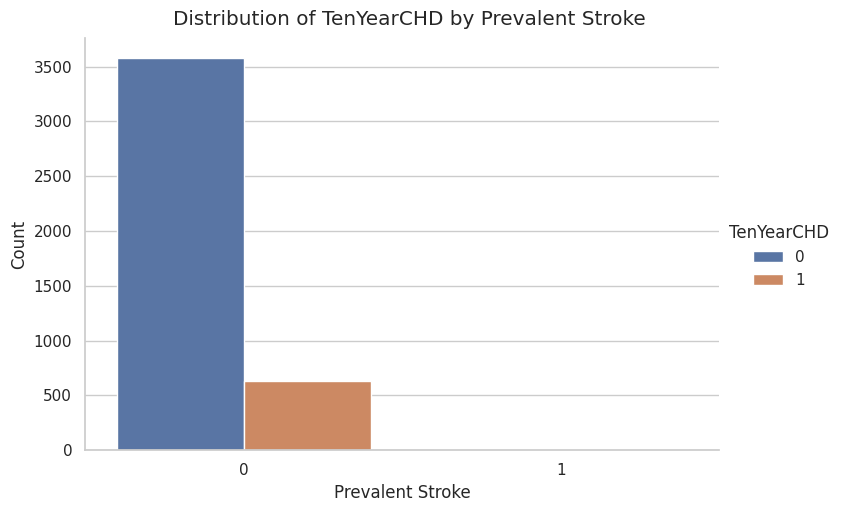

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

stroke = sns.catplot(x='prevalentStroke', hue='TenYearCHD', kind='count', data=df, height=5, aspect=1.5)

stroke.set_axis_labels("Prevalent Stroke", "Count",size=12)
stroke._legend.set_title("TenYearCHD")
stroke.fig.suptitle("Distribution of TenYearCHD by Prevalent Stroke", y=1.02)

**Observation**

Even though the percentage of people with TenYearCHD among those with a history of stroke is 44%, much higher than among those without a history of stroke who have TenYearCHD (15.2%); we cannot infer whether stroke would have had a large effect on the risk of having CHD, due to the small sample size of participants with a history of stroke.

**5. Hypertension vs. TenYearCHD**

In [ ]:
df.groupby(['prevalentHyp', 'TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
prevalentHyp,,
0,2604,319
1,992,325


In [ ]:
# Calculate the percentage of people has prevalent hypertension with CHD risk
percentage_hypertension_chd = round(325 / (325 + 992) * 100, 2)

# Print the result
print("Percentage of people has prevalent hypertension with CHD risk: " + str(percentage_hypertension_chd) + "%")

Percentage of people has prevalent hypertension with CHD risk: 24.68%


In [ ]:
# Calculate the percentage of people has no prevalent hypertension with CHD risk
percentage_nonhypertension_chd = round(319 / (319 + 2604) * 100, 2)

# Print the result
print("Percentage of people has no prevalent hypertension with CHD risk: " + str(percentage_nonhypertension_chd) + "%")

Percentage of people has no prevalent hypertension with CHD risk: 10.91%


Text(0.5, 1.02, 'Distribution of TenYearCHD by Prevalent Hypertension')

<Figure size 800x1000 with 0 Axes>

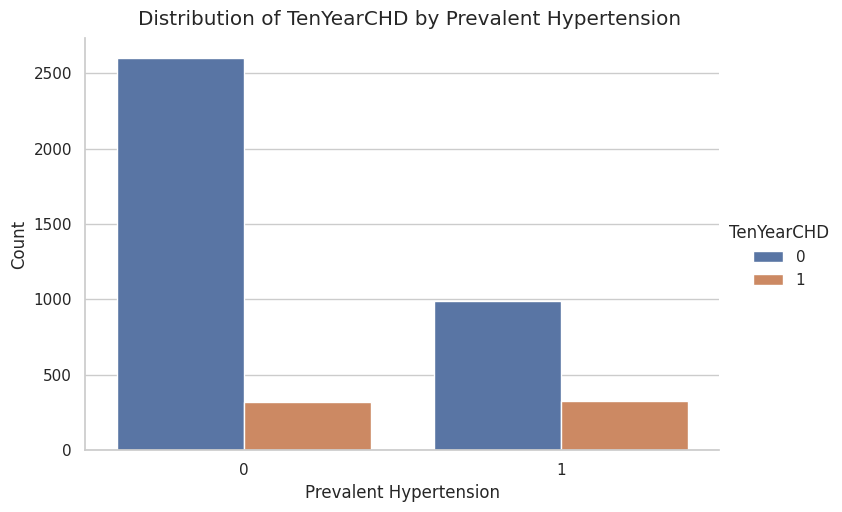

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

hypertension = sns.catplot(x='prevalentHyp', hue='TenYearCHD', kind='count', data=df, height=5, aspect=1.5)

hypertension.set_axis_labels("Prevalent Hypertension", "Count",size=12)
hypertension._legend.set_title("TenYearCHD")
hypertension.fig.suptitle("Distribution of TenYearCHD by Prevalent Hypertension", y=1.02)

**Observation**

Participants prevalently had hypertension has more effect on the risk of TenYearCHD, which is also consistent with the impact of having BPMeds on the risk of CHD above.

**6. Diabetes vs. TenYearCHD**

In [ ]:
df.groupby(['diabetes', 'TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
diabetes,,
0,3527,604
1,69,40


In [ ]:
# Calculate the percentage of people has diabetes with CHD risk
percentage_diabetes_chd = round(40 / (40 + 69) * 100, 2)

# Print the result
print("Percentage of people has diabetes with CHD risk: " + str(percentage_diabetes_chd) + "%")

Percentage of people has diabetes with CHD risk: 36.7%


In [ ]:
# Calculate the percentage of people has no diabetes with CHD risk
percentage_nondiabetes_chd = round(604 / (604 + 3527) * 100, 2)

# Print the result
print("Percentage of people has no diabetes with CHD risk: " + str(percentage_nondiabetes_chd) + "%")

Percentage of people has no diabetes with CHD risk: 14.62%


Text(0.5, 1.02, 'Distribution of TenYearCHD by Diabetes')

<Figure size 800x1000 with 0 Axes>

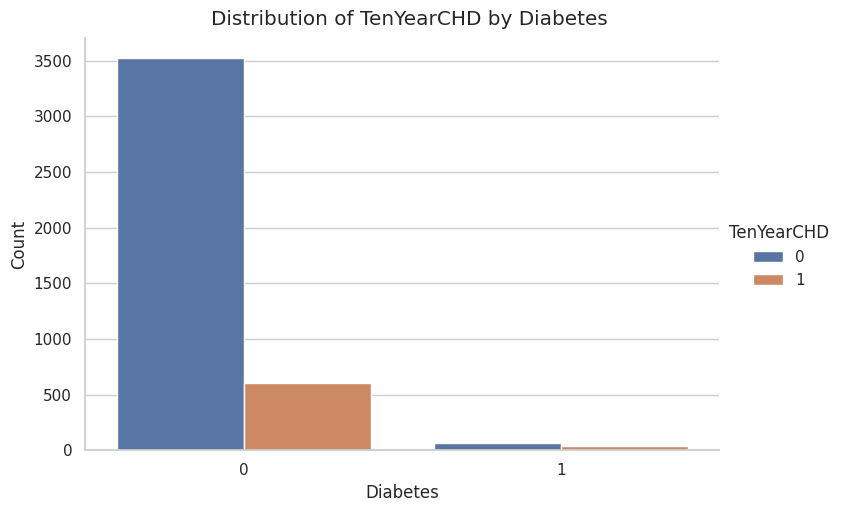

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

diabetes = sns.catplot(x='diabetes', hue='TenYearCHD', kind='count', data=df, height=5, aspect=1.5)

diabetes.set_axis_labels("Diabetes", "Count",size=12)
diabetes._legend.set_title("TenYearCHD")
diabetes.fig.suptitle("Distribution of TenYearCHD by Diabetes", y=1.02)

**Observation**

Even though the percentage of people with TenYearCHD among those with diabetes is 36.7%, much higher than among those without diabetes who have TenYearCHD (14.62%); we cannot infer whether stroke would have had a large effect on the risk of having CHD, due to the small sample size of participants with a history of stroke.

**Observation**

Among the categorical features:

*BPMeds* (33.06%), *prevalentHyp* (24.68%) may have a greater impact on whether or not one was at risk for CHD.

### B. Numerical Features

**1. Age vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='age', aggfunc='mean')

,age
TenYearCHD,
0,48.762514
1,54.145963


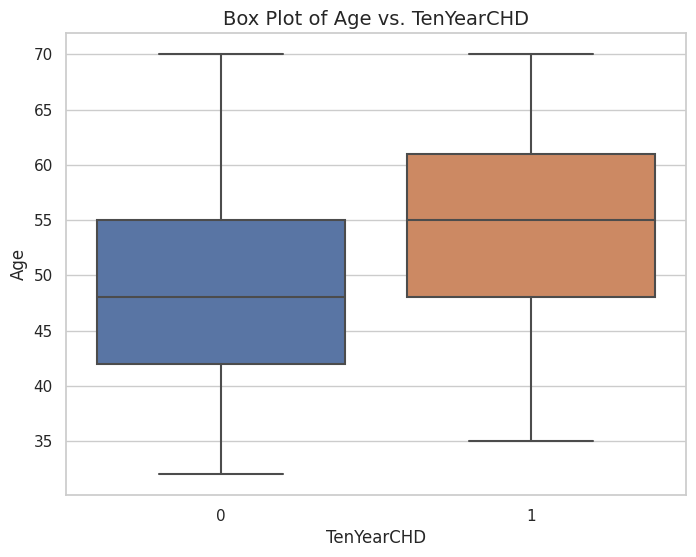

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='age', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Box Plot of Age vs. TenYearCHD', fontsize=14)
plt.show()

The minimum age of people getting CHD is 35 years old, which implies that people under age of 35 always have the low risk to get CHD.

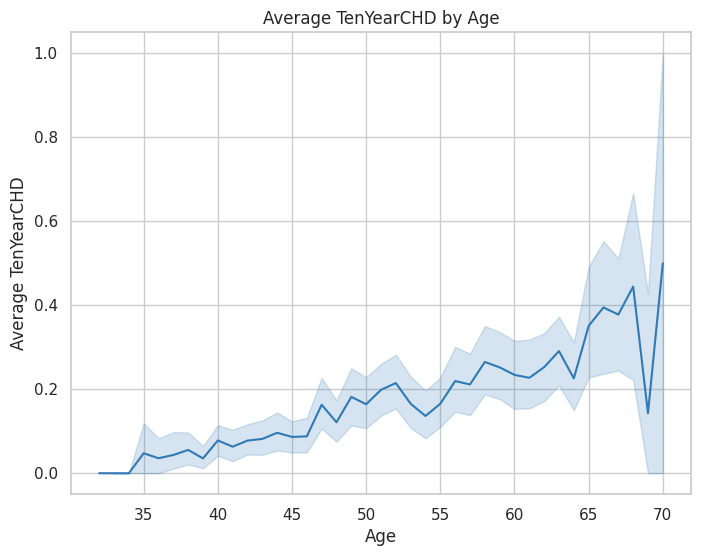

In [ ]:
sns.set_palette("RdBu_r")

plt.figure(figsize=(8, 6))

sns.lineplot(data=df, x='age', y='TenYearCHD')

plt.xlabel('Age')
plt.ylabel('Average TenYearCHD')
plt.title('Average TenYearCHD by Age')
plt.show()

**Observation**

Older participants were more likely to have CHD in ten years. The likelihood of getting CHD peaks around age 65 and at age 70, but there is a decline of less than 0.2% at age 69.

**2. Cigarattes Smoking vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='cigsPerDay', aggfunc='mean')

,cigsPerDay
TenYearCHD,
0,8.798665
1,10.658385


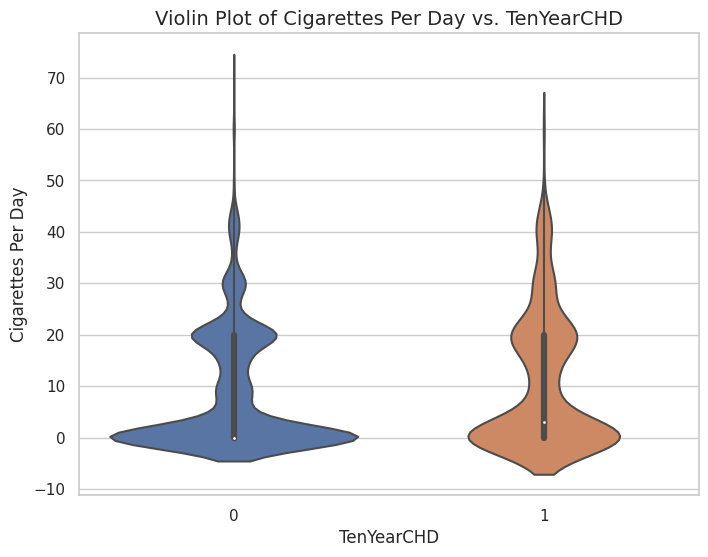

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.violinplot(x='TenYearCHD', y='cigsPerDay', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Cigarettes Per Day', fontsize=12)
plt.title('Violin Plot of Cigarettes Per Day vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Low cigsPerDay comes with lower risk of CHD. However, low cigsPerDay doesn't mean a lower risk of CHD. It's a tricky problem because, in common sense, people who like smoking tend to get CHD and other diseases. The possible reason leading to this summary is that this dataset isn't comprehensive.

**3. Total Cholesterol vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='totChol', aggfunc='mean')

,totChol
TenYearCHD,
0,235.134316
1,245.229814


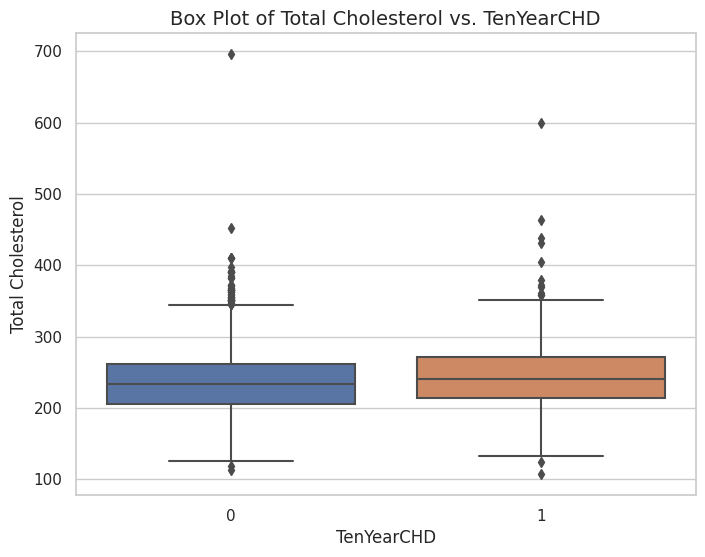

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='totChol', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Total Cholesterol', fontsize=12)
plt.title('Box Plot of Total Cholesterol vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Minor relation of TenYearCHD with totChol.

**4. Systolic Blood Pressure vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='sysBP', aggfunc='mean')

,sysBP
TenYearCHD,
0,130.337319
1,143.618789


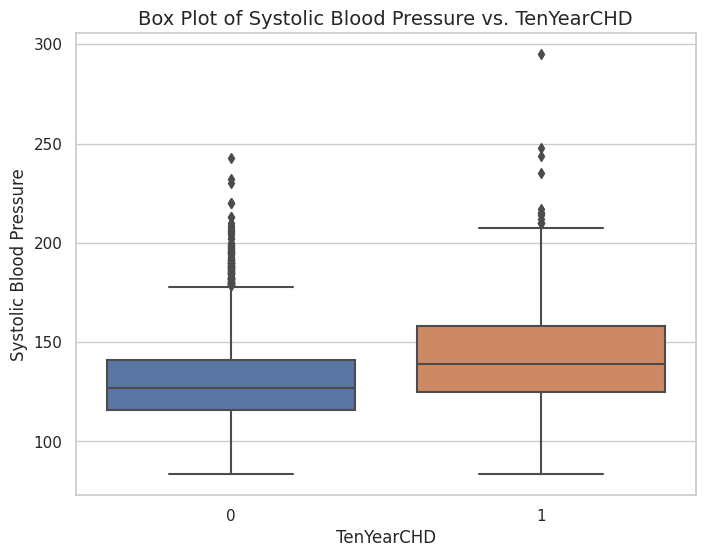

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='sysBP', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Systolic Blood Pressure', fontsize=12)
plt.title('Box Plot of Systolic Blood Pressure vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Higher sysBP have a higher risk of TenYearCHD.

**5. Diastolic Blood Pressure vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='diaBP', aggfunc='mean')

,diaBP
TenYearCHD,
0,82.166435
1,86.981366


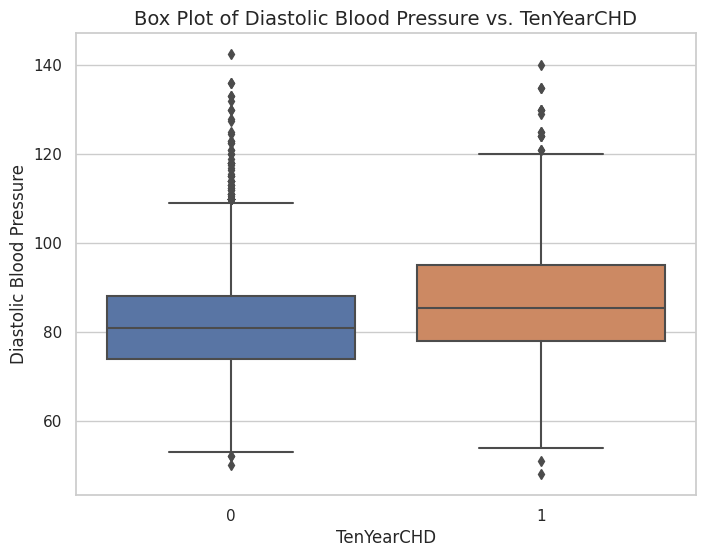

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='diaBP', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Diastolic Blood Pressure', fontsize=12)
plt.title('Box Plot of Diastolic Blood Pressure vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Higher diaBP have a higher risk of TenYearCHD.

**6. BodyMass Index vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='BMI', aggfunc='mean')

,BMI
TenYearCHD,
0,25.670979
1,26.513882


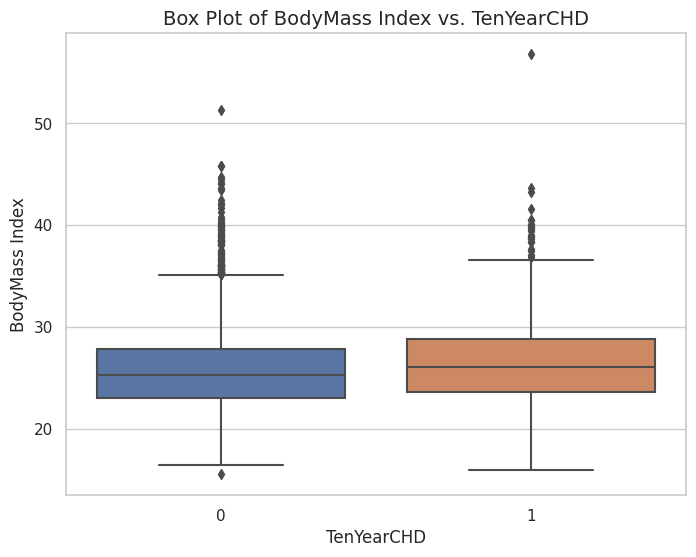

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='BMI', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('BodyMass Index', fontsize=12)
plt.title('Box Plot of BodyMass Index vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Minor relation of TenYearCHD with BMI.

**7. Heart Rate vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='heartRate', aggfunc='mean')

,heartRate
TenYearCHD,
0,75.762514
1,76.527950


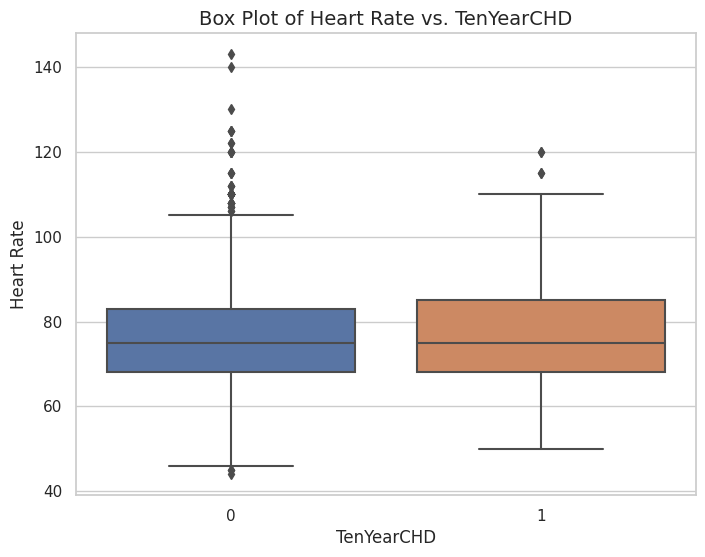

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='heartRate', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Heart Rate', fontsize=12)
plt.title('Box Plot of Heart Rate vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Minor relation of TenYearCHD with heartRate.

**8. Total Glucose vs. TenYearCHD**

In [ ]:
df.pivot_table(index='TenYearCHD', values='glucose', aggfunc='mean')

,glucose
TenYearCHD,
0,80.427419
1,88.153727


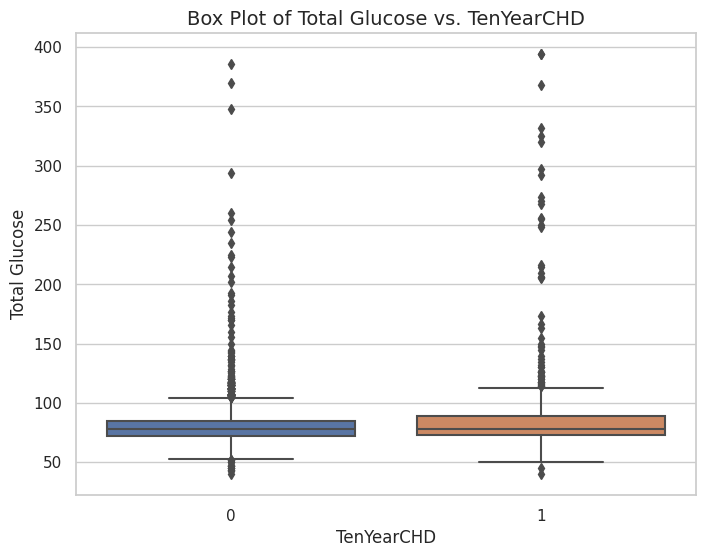

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))

sns.boxplot(x='TenYearCHD', y='glucose', data=df)

plt.xlabel('TenYearCHD', fontsize=12)
plt.ylabel('Total Glucose', fontsize=12)
plt.title('Box Plot of Total Glucose vs. TenYearCHD', fontsize=14)
plt.show()

**Observation**

Minor relation of TenYearCHD with glucose.

**Observation**

Above all, the *age*, *cigsPerDay*, *sysBP*, and *diaBP* may have huge effects on people getting CHD ten years late. The other attributes may only have slight effect and even no effect. However, this summary may not be general on account of the limitation of this dataset. Some important factors aren't considered into the process of data selection. It is also possible that there are several factors working together to lead to people getting CHD.

### C. Correlation

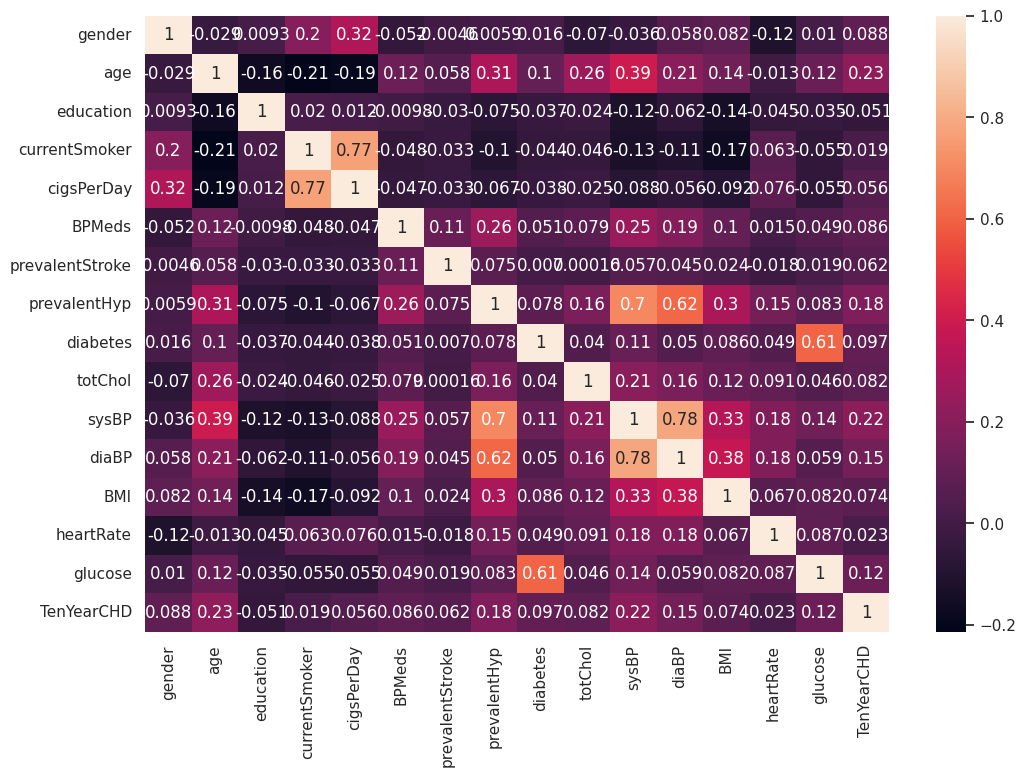

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

**Observation:**

From the above correlation heatmap, it can be learned that none of the risk factors used in the study had a correlation of more than 0.3 with the 10 year risk of coronary heart disease(CHD), which means that the risk factors used in the study were poor.

The three risk factors that have the highest correlation with CHD: *age*, *prevalentHyp*, *sysBP*, and *diaBP*, which are consistent with the observations we got from categorical features analysis and numerical features analysis.

### D. Feature Importance

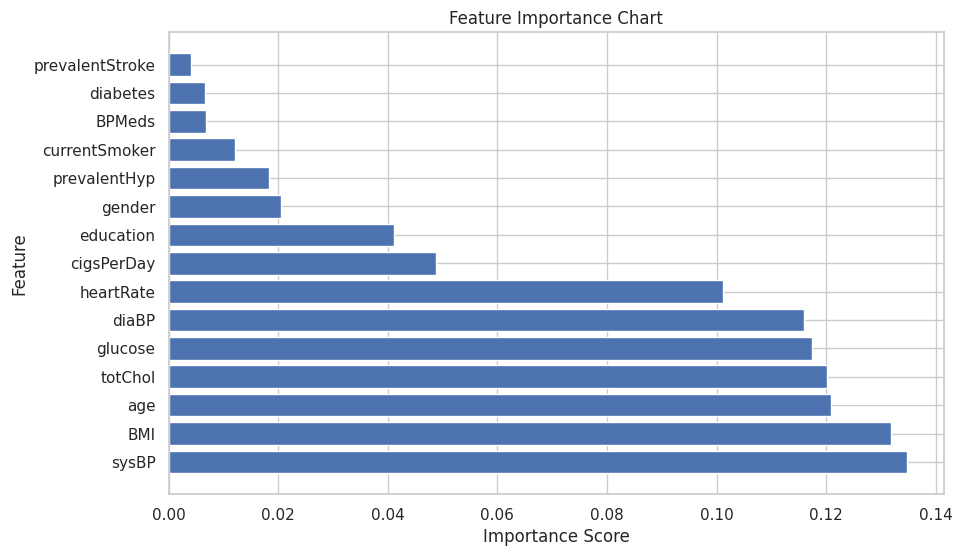

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the features (independent variables) and the target (dependent variable)
features = df.drop('TenYearCHD', axis=1)
target = df['TenYearCHD']

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to your data
rf_classifier.fit(features, target)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance Chart')
plt.show()




---



**Observation**

The top 5 scrores of feature importance are 'sysBp', 'BMI',
 'age', 'totChol' and 'glucose'. This result doesn't surprise me because all this 5 factors are always considered to monitor human's body health. It is surprising that the attribute of 'education' has such effect. It may because that people who are well-educated may have more healthy lifestyle and balanced diet, which contributes to their body index are better than those with low level education.


---



## VII. Summary

In conclusion, the most influential factors in the categorical data for having CHD in ten years are BPMeds (33.06%) and prevalentHyp (24.68%); and the most influential factors in the numerical data for having CHD in ten years are age, cigsPerDay, sysBP, and diaBP. By correlation and feature importance validation, we can conclude that *sysBP*, *age*, and *diaBP* may be the Top 3 factors contributing to CHD in ten years.



##References

[1] https://github.com/GauravPadawe/Framingham-Heart-Study/blob/master/README.md

[2] M. Soltanieh-ha, "**BA780 - Introduction to Data Anaytics**", Colab Notebooks, Fall 2023

[3] Datacamp Modules